# Relevant Questions/ Business Understanding

    1. What is the general view of the public on the new F1 2022 car and regulations?
    2. How did the public's opinion change from March 2020 to March 2022 (before first race of 2022 season)? 
   [Article about delaying new F1 regulations to 2022](https://www.formula1.com/en/latest/article.fia-announce-new-f1-regulations-to-be-delayed-until-2022.1lwtaLmpNcQd0z9SnMEyK8.html), which was published on March 19, 2020.
   
    3. What were the main keywords on the new cars and regulations? (tag cloud)

# Data Collection

In [1]:
import pandas as pd
from datetime import datetime as dt
import twint as t
import nest_asyncio
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline


analyzer = SentimentIntensityAnalyzer()

nest_asyncio.apply()

In [2]:
# extract tweets about f1 2022 car from March 19, 2020 to March 17, 2022

"""
c = t.Config()

c.Search = ["f1 2022 car"]
c.Limit = None
c.Store_csv = True
c.Output = "tweets.csv"
c.Lang = "en"
c.Since = "2020-3-19"
c.Until = "2022-3-17"

t.run.Search(c)
"""

'\nc = t.Config()\n\nc.Search = ["f1 2022 car"]\nc.Limit = None\nc.Store_csv = True\nc.Output = "tweets.csv"\nc.Lang = "en"\nc.Since = "2020-3-19"\nc.Until = "2022-3-17"\n\nt.run.Search(c)\n'

In [3]:
# store in a pandas dataframe
df = pd.read_csv("tweets.csv")

In [4]:
df.head()

id      conversation_id  \
0  1504233064502857732  1504216927971024904   
1  1504191974806626313  1504191974806626313   
2  1504147041500467202  1504147041500467202   
3  1504125478445236227  1504125478445236227   
4  1504117147378794497  1504117147378794497   

                                created_at        date      time  timezone  \
0  2022-03-17 07:08:04 China Standard Time  2022-03-17  07:08:04       800   
1  2022-03-17 04:24:47 China Standard Time  2022-03-17  04:24:47       800   
2  2022-03-17 01:26:15 China Standard Time  2022-03-17  01:26:15       800   
3  2022-03-17 00:00:34 China Standard Time  2022-03-17  00:00:34       800   
4  2022-03-16 23:27:27 China Standard Time  2022-03-16  23:27:27       800   

               user_id         username                name place  ... geo  \
0   896928340346535937  cosmic_interest          Luca Viani   NaN  ... NaN   
1  1366503856495026184   therealbazzzy_              Bazzzy   NaN  ... NaN   
2           2283806204      rparabrisas  Revista Parabrisas   NaN  ... NaN   
3  1376348324299694081   loseweight8119          FitForLife   NaN  ... NaN   
4            434300744      matthilger1                MATT   NaN  ... NaN   

  source user_rt_id user_rt retweet_id  \
0    NaN        NaN     NaN        NaN   
1    NaN        NaN     NaN        NaN   
2    NaN        NaN     NaN        NaN   
3    NaN        NaN     NaN        NaN   
4    NaN        NaN     NaN        NaN   

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'TwommoF1', 'name': 'Tommo', ...           NaN        NaN   
1                                                 []           NaN        NaN   
2                                                 []           NaN        NaN   
3                                                 []           NaN        NaN   
4                                                 []           NaN        NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 36 columns]

In [5]:
df["tweet"]

0       @TwommoF1 F1 2022 car, you can fit a family in...
1       I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...
2       Los nuevos Safety Car y Medical Car de la F1 2...
3       F1 2022: six things to look forward to in the ...
4       Why Bahrain has exposed the weaknesses of F1 2...
                              ...                        
2309          Those rims will be on F1 2022 cars ohvgkkgg
2310    F1 2022 Concept Liveries.   What do you think ...
2311    CAN NOT WAIT FOR F1 2022. These cars look insa...
2312    Ford F1 2022 Livery Concept and on track visua...
2313    Brawn rules out any further delay of new #F1 2...
Name: tweet, Length: 2314, dtype: object

# Data Cleaning

In [6]:
df.isnull().sum()

id                    0
conversation_id       0
created_at            0
date                  0
time                  0
timezone              0
user_id               0
username              0
name                  0
place              2310
tweet                 0
language              0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          2184
video                 0
thumbnail          1714
near               2314
geo                2314
source             2314
user_rt_id         2314
user_rt            2314
retweet_id         2314
reply_to              0
retweet_date       2314
translate          2314
trans_src          2314
trans_dest         2314
dtype: int64

In [7]:
required_columns = ['created_at', 'date', 'time', 'username', 'name', 'tweet', 'language']
df = df[required_columns]

In [8]:
df.head()

created_at        date      time  \
0  2022-03-17 07:08:04 China Standard Time  2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time  2022-03-17  04:24:47   
2  2022-03-17 01:26:15 China Standard Time  2022-03-17  01:26:15   
3  2022-03-17 00:00:34 China Standard Time  2022-03-17  00:00:34   
4  2022-03-16 23:27:27 China Standard Time  2022-03-16  23:27:27   

          username                name  \
0  cosmic_interest          Luca Viani   
1   therealbazzzy_              Bazzzy   
2      rparabrisas  Revista Parabrisas   
3   loseweight8119          FitForLife   
4      matthilger1                MATT   

                                               tweet language  
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  
2  Los nuevos Safety Car y Medical Car de la F1 2...       es  
3  F1 2022: six things to look forward to in the ...       en  
4  Why Bahrain has exposed the weaknesses of F1 2...       en

In [9]:
df.isnull().sum()

created_at    0
date          0
time          0
username      0
name          0
tweet         0
language      0
dtype: int64

In [10]:
df.language.unique()

array(['en', 'es', 'fr', 'ja', 'ca', 'it', 'el', 'in', 'pt', 'de', 'no',
       'et', 'und', 'hu', 'nl', 'da', 'sv', 'tl', 'zh'], dtype=object)

In [11]:
df.loc[df["language"] == "en"]

created_at        date      time  \
0     2022-03-17 07:08:04 China Standard Time  2022-03-17  07:08:04   
1     2022-03-17 04:24:47 China Standard Time  2022-03-17  04:24:47   
3     2022-03-17 00:00:34 China Standard Time  2022-03-17  00:00:34   
4     2022-03-16 23:27:27 China Standard Time  2022-03-16  23:27:27   
5     2022-03-16 22:02:20 China Standard Time  2022-03-16  22:02:20   
...                                       ...         ...       ...   
2309  2020-07-04 22:56:38 China Standard Time  2020-07-04  22:56:38   
2310  2020-06-21 23:25:23 China Standard Time  2020-06-21  23:25:23   
2311  2020-05-28 08:49:55 China Standard Time  2020-05-28  08:49:55   
2312  2020-05-20 22:03:28 China Standard Time  2020-05-20  22:03:28   
2313  2020-05-07 19:00:01 China Standard Time  2020-05-07  19:00:01   

             username                 name  \
0     cosmic_interest           Luca Viani   
1      therealbazzzy_               Bazzzy   
3      loseweight8119           FitForLife   
4         matthilger1                 MATT   
5       theapexmsport  The Apex Motorsport   
...               ...                  ...   
2309       alexteamlh              Alex 🇺🇸   
2310   seanbulldesign     Sean Bull Design   
2311     mattcastle01       Matthew Castle   
2312   seanbulldesign     Sean Bull Design   
2313  insideracingcom     InsideRacing.com   

                                                  tweet language  
0     @TwommoF1 F1 2022 car, you can fit a family in...       en  
1     I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  
3     F1 2022: six things to look forward to in the ...       en  
4     Why Bahrain has exposed the weaknesses of F1 2...       en  
5     Time to take a look at the famous red cars in ...       en  
...                                                 ...      ...  
2309        Those rims will be on F1 2022 cars ohvgkkgg       en  
2310  F1 2022 Concept Liveries.   What do you think ...       en  
2311  CAN NOT WAIT FOR F1 2022. These cars look insa...       en  
2312  Ford F1 2022 Livery Concept and on track visua...       en  
2313  Brawn rules out any further delay of new #F1 2...       en  

[2095 rows x 7 columns]

In [12]:
df = df[df.language == "en"]

In [13]:
df.language.unique()

array(['en'], dtype=object)

In [14]:
df.drop_duplicates(subset = "tweet", inplace = True)

In [15]:
#save files
df.to_csv("tweets_clean.csv", index = False)

#read files
df = pd.read_csv("tweets_clean.csv")

# Exploratory Data Analysis and Feature Engineering

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  2091 non-null   object
 1   date        2091 non-null   object
 2   time        2091 non-null   object
 3   username    2091 non-null   object
 4   name        2091 non-null   object
 5   tweet       2091 non-null   object
 6   language    2091 non-null   object
dtypes: object(7)
memory usage: 114.5+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df["username"].unique()

array(['cosmic_interest', 'therealbazzzy_', 'loseweight8119', ...,
       'seanbulldesign', 'mattcastle01', 'insideracingcom'], dtype=object)

In [19]:
df.shape

(2091, 7)

In [20]:
df.ndim

2

In [21]:
df.describe()

created_at        date      time  \
count                                      2091        2091      2091   
unique                                     2087         281      2033   
top     2022-02-10 00:32:43 China Standard Time  2021-07-15  22:14:32   
freq                                          2         183         3   

        username      name                                              tweet  \
count       2091      2091                                               2091   
unique      1365      1360                                               2091   
top     f1reader  F1reader  @TwommoF1 F1 2022 car, you can fit a family in...   
freq          31        31                                                  1   

       language  
count      2091  
unique        1  
top          en  
freq       2091

In [22]:
df["tweet"].describe()

count                                                  2091
unique                                                 2091
top       @TwommoF1 F1 2022 car, you can fit a family in...
freq                                                      1
Name: tweet, dtype: object

In [23]:
df["username"].describe()

count         2091
unique        1365
top       f1reader
freq            31
Name: username, dtype: object

In [24]:
df.head()

created_at        date      time  \
0  2022-03-17 07:08:04 China Standard Time  2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time  2022-03-17  04:24:47   
2  2022-03-17 00:00:34 China Standard Time  2022-03-17  00:00:34   
3  2022-03-16 23:27:27 China Standard Time  2022-03-16  23:27:27   
4  2022-03-16 22:02:20 China Standard Time  2022-03-16  22:02:20   

          username                 name  \
0  cosmic_interest           Luca Viani   
1   therealbazzzy_               Bazzzy   
2   loseweight8119           FitForLife   
3      matthilger1                 MATT   
4    theapexmsport  The Apex Motorsport   

                                               tweet language  
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  
2  F1 2022: six things to look forward to in the ...       en  
3  Why Bahrain has exposed the weaknesses of F1 2...       en  
4  Time to take a look at the famous red cars in ...       en

In [25]:
# generate sentiment scores per tweet
sentiment_score = df["tweet"].apply(lambda x: analyzer.polarity_scores(x))

# add sentiment score to dataframe
df = pd.concat([df, sentiment_score.apply(pd.Series)],1)

C:\Users\Christian\AppData\Local\Temp\ipykernel_1928\525305402.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df, sentiment_score.apply(pd.Series)],1)


In [26]:
df.head()

created_at        date      time  \
0  2022-03-17 07:08:04 China Standard Time  2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time  2022-03-17  04:24:47   
2  2022-03-17 00:00:34 China Standard Time  2022-03-17  00:00:34   
3  2022-03-16 23:27:27 China Standard Time  2022-03-16  23:27:27   
4  2022-03-16 22:02:20 China Standard Time  2022-03-16  22:02:20   

          username                 name  \
0  cosmic_interest           Luca Viani   
1   therealbazzzy_               Bazzzy   
2   loseweight8119           FitForLife   
3      matthilger1                 MATT   
4    theapexmsport  The Apex Motorsport   

                                               tweet language    neg    neu  \
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  0.000  0.811   
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  0.000  0.861   
2  F1 2022: six things to look forward to in the ...       en  0.000  0.960   
3  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
4  Time to take a look at the famous red cars in ...       en  0.000  1.000   

     pos  compound  
0  0.189    0.4199  
1  0.139    0.5951  
2  0.040    0.2023  
3  0.000   -0.4215  
4  0.000    0.0000

In [27]:
df["date"] = df["date"].apply(lambda x: dt.strptime(x,"%Y-%m-%d"))

In [28]:
df["year_month"] = pd.to_datetime(df["date"]).dt.to_period("M")

In [29]:
df.head()

created_at       date      time  \
0  2022-03-17 07:08:04 China Standard Time 2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time 2022-03-17  04:24:47   
2  2022-03-17 00:00:34 China Standard Time 2022-03-17  00:00:34   
3  2022-03-16 23:27:27 China Standard Time 2022-03-16  23:27:27   
4  2022-03-16 22:02:20 China Standard Time 2022-03-16  22:02:20   

          username                 name  \
0  cosmic_interest           Luca Viani   
1   therealbazzzy_               Bazzzy   
2   loseweight8119           FitForLife   
3      matthilger1                 MATT   
4    theapexmsport  The Apex Motorsport   

                                               tweet language    neg    neu  \
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  0.000  0.811   
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  0.000  0.861   
2  F1 2022: six things to look forward to in the ...       en  0.000  0.960   
3  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
4  Time to take a look at the famous red cars in ...       en  0.000  1.000   

     pos  compound year_month  
0  0.189    0.4199    2022-03  
1  0.139    0.5951    2022-03  
2  0.040    0.2023    2022-03  
3  0.000   -0.4215    2022-03  
4  0.000    0.0000    2022-03

<AxesSubplot:>

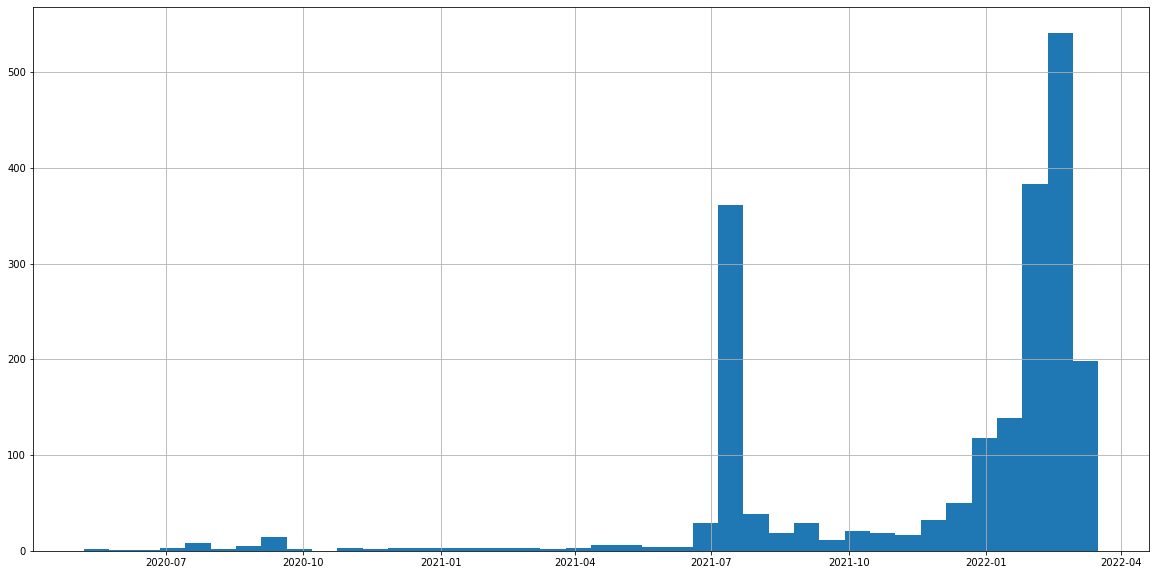

In [30]:
df["date"].hist(figsize=(20,10), bins=40)

In [31]:
df["7day_rolling_avg"] = df["compound"].rolling(7).mean()

In [32]:
df.head(10)

created_at       date      time  \
0  2022-03-17 07:08:04 China Standard Time 2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time 2022-03-17  04:24:47   
2  2022-03-17 00:00:34 China Standard Time 2022-03-17  00:00:34   
3  2022-03-16 23:27:27 China Standard Time 2022-03-16  23:27:27   
4  2022-03-16 22:02:20 China Standard Time 2022-03-16  22:02:20   
5  2022-03-16 16:36:42 China Standard Time 2022-03-16  16:36:42   
6  2022-03-16 13:20:31 China Standard Time 2022-03-16  13:20:31   
7  2022-03-16 12:03:14 China Standard Time 2022-03-16  12:03:14   
8  2022-03-16 10:43:00 China Standard Time 2022-03-16  10:43:00   
9  2022-03-16 07:54:37 China Standard Time 2022-03-16  07:54:37   

          username                 name  \
0  cosmic_interest           Luca Viani   
1   therealbazzzy_               Bazzzy   
2   loseweight8119           FitForLife   
3      matthilger1                 MATT   
4    theapexmsport  The Apex Motorsport   
5     bcabanetwork        BCABA Network   
6    boostandjuice    boostandjuice.com   
7          srose93           Scott Rose   
8    newshimalaya2        News Himalaya   
9       okimikobot           okimikobot   

                                               tweet language    neg    neu  \
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  0.000  0.811   
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  0.000  0.861   
2  F1 2022: six things to look forward to in the ...       en  0.000  0.960   
3  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
4  Time to take a look at the famous red cars in ...       en  0.000  1.000   
5  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
6  How McLaren has beaten F1 2022’s major car pro...       en  0.419  0.581   
7  Why Bahrain has exposed the weaknesses of #F1 ...       en  0.257  0.743   
8  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
9  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   

     pos  compound year_month  7day_rolling_avg  
0  0.189    0.4199    2022-03               NaN  
1  0.139    0.5951    2022-03               NaN  
2  0.040    0.2023    2022-03               NaN  
3  0.000   -0.4215    2022-03               NaN  
4  0.000    0.0000    2022-03               NaN  
5  0.000   -0.4215    2022-03               NaN  
6  0.000   -0.6983    2022-03         -0.046286  
7  0.000   -0.4215    2022-03         -0.166486  
8  0.000   -0.4215    2022-03         -0.311714  
9  0.000   -0.4215    2022-03         -0.400829

In [33]:
df["comp_score"] = df["compound"].apply(lambda x: "pos" if x > 0 else ("neg" if x < 0 else "neu"))

In [34]:
df.head()

created_at       date      time  \
0  2022-03-17 07:08:04 China Standard Time 2022-03-17  07:08:04   
1  2022-03-17 04:24:47 China Standard Time 2022-03-17  04:24:47   
2  2022-03-17 00:00:34 China Standard Time 2022-03-17  00:00:34   
3  2022-03-16 23:27:27 China Standard Time 2022-03-16  23:27:27   
4  2022-03-16 22:02:20 China Standard Time 2022-03-16  22:02:20   

          username                 name  \
0  cosmic_interest           Luca Viani   
1   therealbazzzy_               Bazzzy   
2   loseweight8119           FitForLife   
3      matthilger1                 MATT   
4    theapexmsport  The Apex Motorsport   

                                               tweet language    neg    neu  \
0  @TwommoF1 F1 2022 car, you can fit a family in...       en  0.000  0.811   
1  I AM LIVE FOR MY FIRST STREAM AS PAST OF THE T...       en  0.000  0.861   
2  F1 2022: six things to look forward to in the ...       en  0.000  0.960   
3  Why Bahrain has exposed the weaknesses of F1 2...       en  0.297  0.703   
4  Time to take a look at the famous red cars in ...       en  0.000  1.000   

     pos  compound year_month  7day_rolling_avg comp_score  
0  0.189    0.4199    2022-03               NaN        pos  
1  0.139    0.5951    2022-03               NaN        pos  
2  0.040    0.2023    2022-03               NaN        pos  
3  0.000   -0.4215    2022-03               NaN        neg  
4  0.000    0.0000    2022-03               NaN        neu

In [35]:
df.corr()

neg       neu       pos  compound  7day_rolling_avg
neg               1.000000 -0.560560 -0.085336 -0.551877         -0.309414
neu              -0.560560  1.000000 -0.777256 -0.270483         -0.044616
pos              -0.085336 -0.777256  1.000000  0.744751          0.287901
compound         -0.551877 -0.270483  0.744751  1.000000          0.439547
7day_rolling_avg -0.309414 -0.044616  0.287901  0.439547          1.000000

<AxesSubplot:>

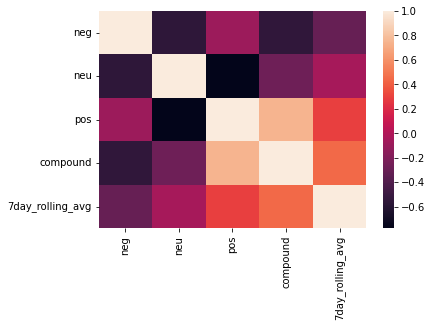

In [36]:
sns.heatmap(df.corr())

<AxesSubplot:>

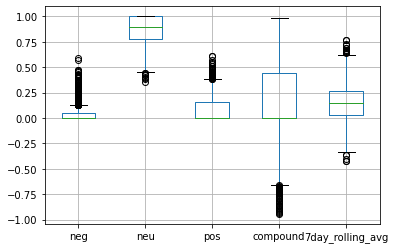

In [37]:
df.boxplot()

<AxesSubplot:ylabel='compound'>

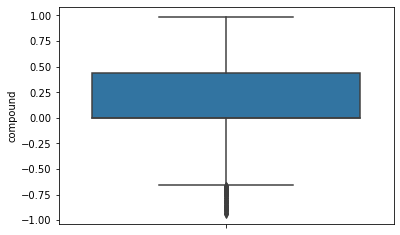

In [38]:
sns.boxplot(y=df["compound"])

<AxesSubplot:ylabel='compound'>

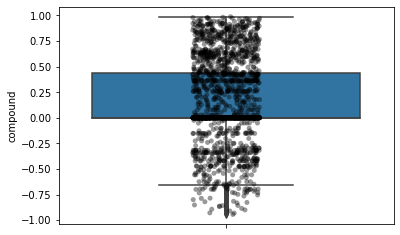

In [41]:
sns.boxplot(y=df["compound"])
sns.stripplot(y=df["compound"], jitter=True, marker="o", alpha=0.4, color="black")

<AxesSubplot:>

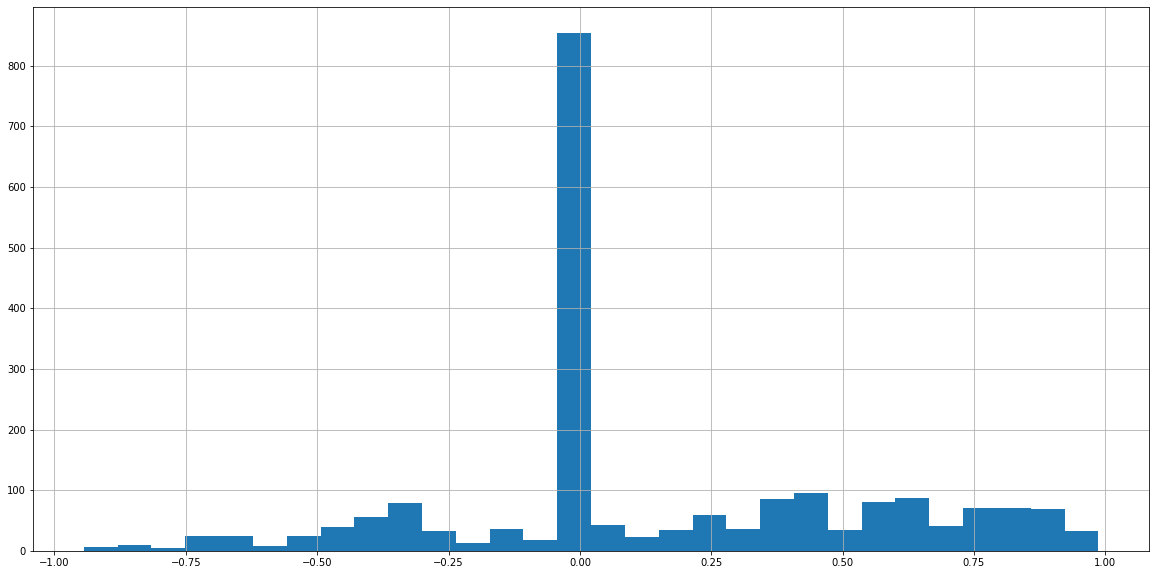

In [42]:
df["compound"].hist(bins=30, figsize=(20,10))

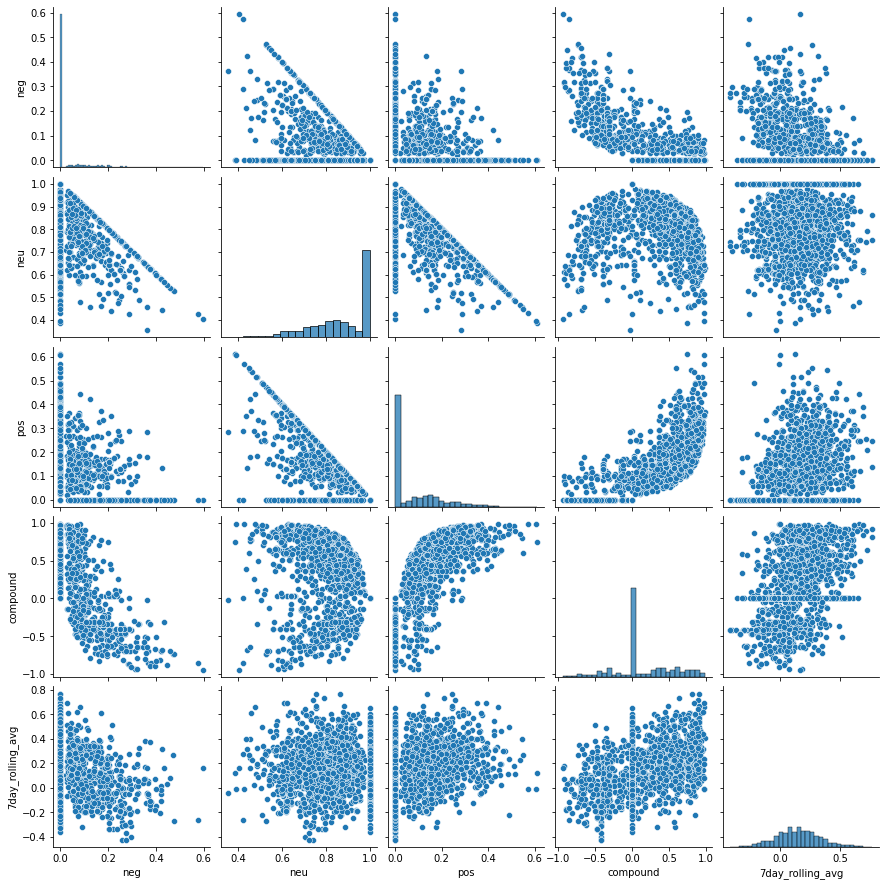

In [43]:
sns.pairplot(df)

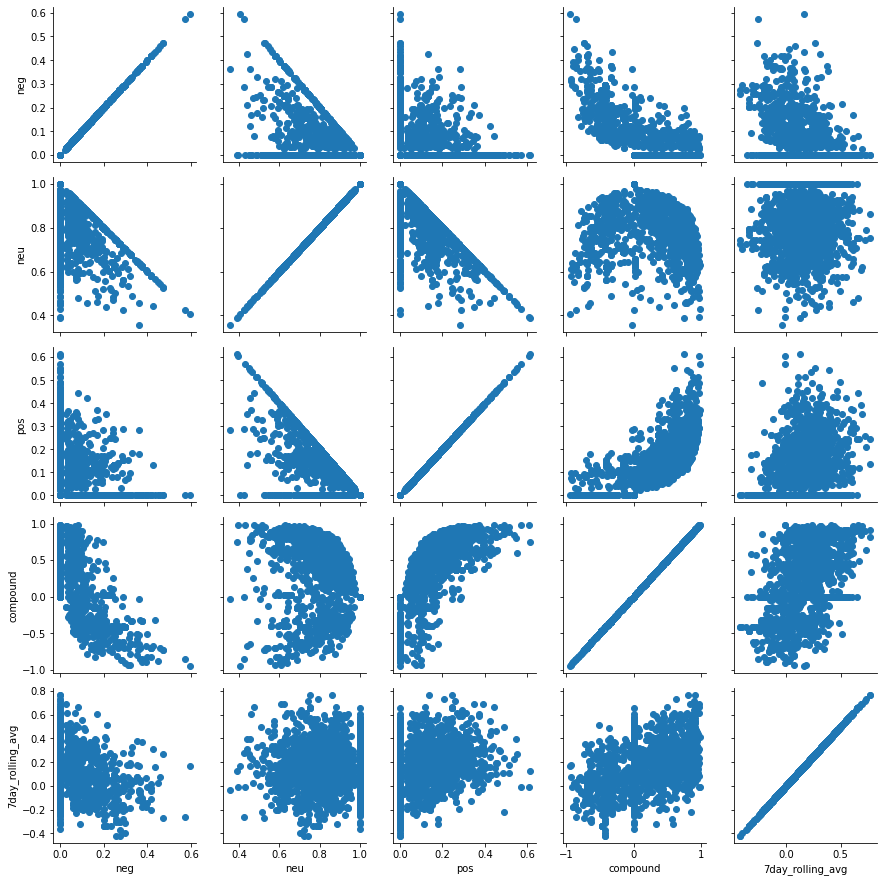

In [44]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [45]:
profile = pandas_profiling.ProfileReport(df)

In [46]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
profile.to_file("data_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Conclusions and Visualizations

1. What is the general view of the public on the new F1 2022 car and regulations?

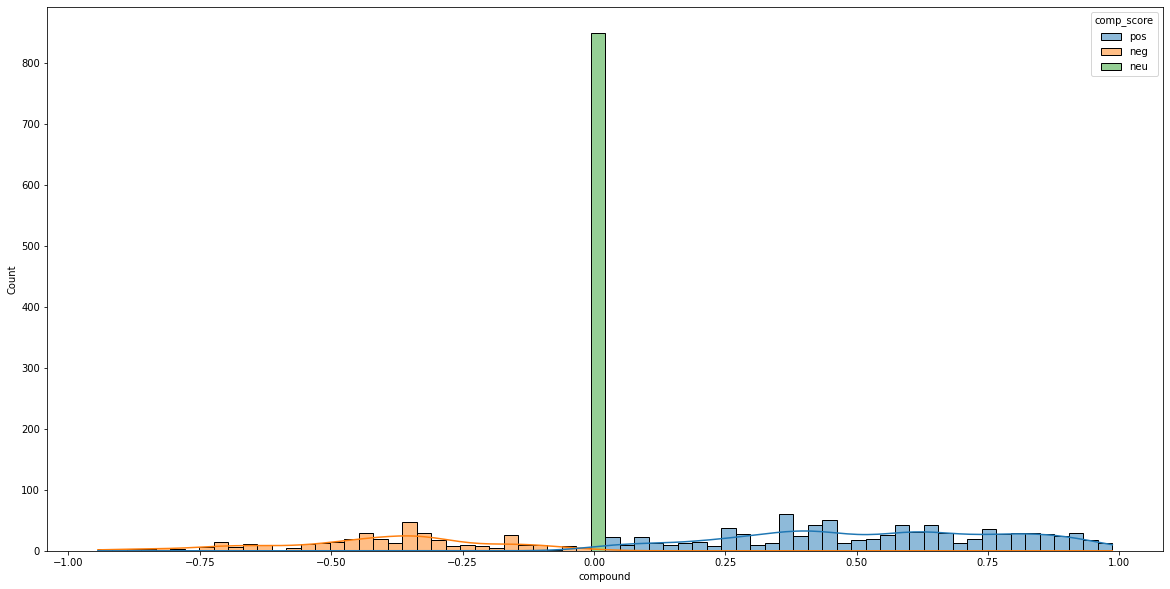

In [48]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="compound", bins=70, kde=True, hue="comp_score")
plt.show()

Based on the massive spike near the neutral (0) to slightly positive area (>0), this suggests that the general view of the public is generally neutral to slightly positive.

2. How did the public's opinion change from March 2020 to March 2022 (before first race of 2022 season)? 

C:\Users\Christian\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


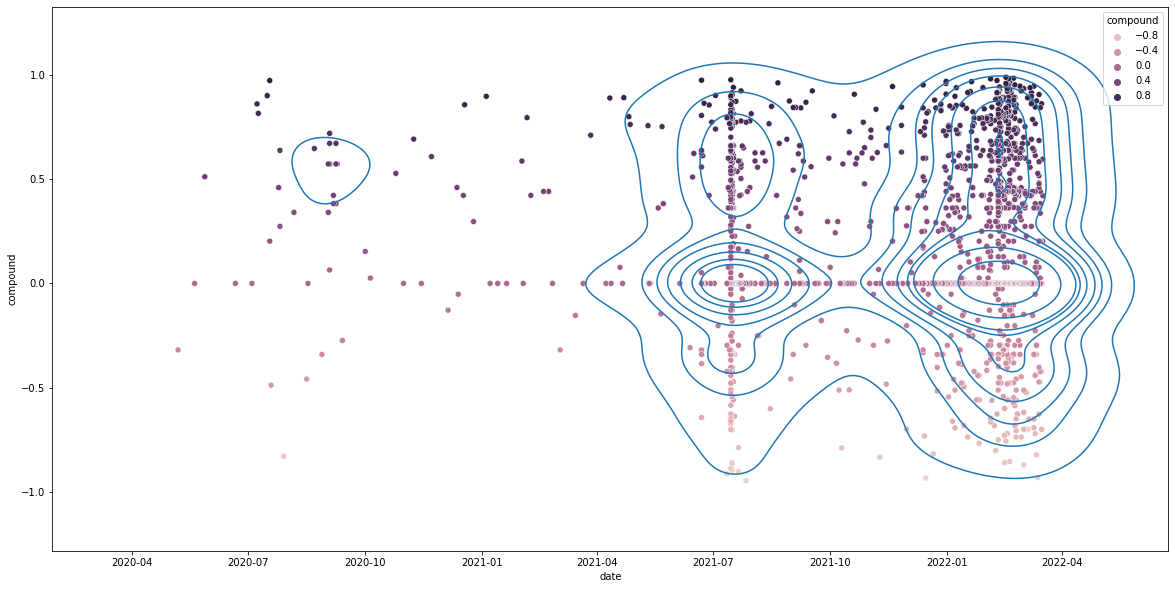

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="date", y="compound", hue="compound")
sns.kdeplot(df["date"], df["compound"])
plt.show()

The sudden spike around July 2021 and at the start of 2022 can be attributed to the car launch in July 2021, and the respective car reveals per team for the 2022 season.

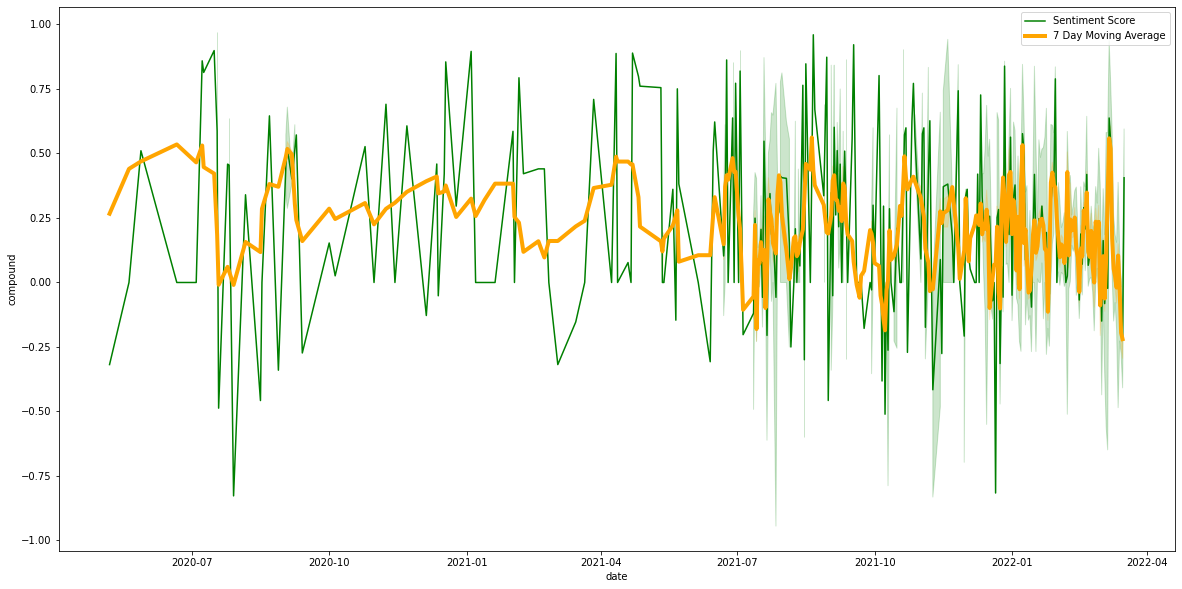

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="date", y="compound", label="Sentiment Score", color="green")
sns.lineplot(data=df, x="date", y="7day_rolling_avg", label="7 Day Moving Average", color="orange", linewidth=4)
plt.show()

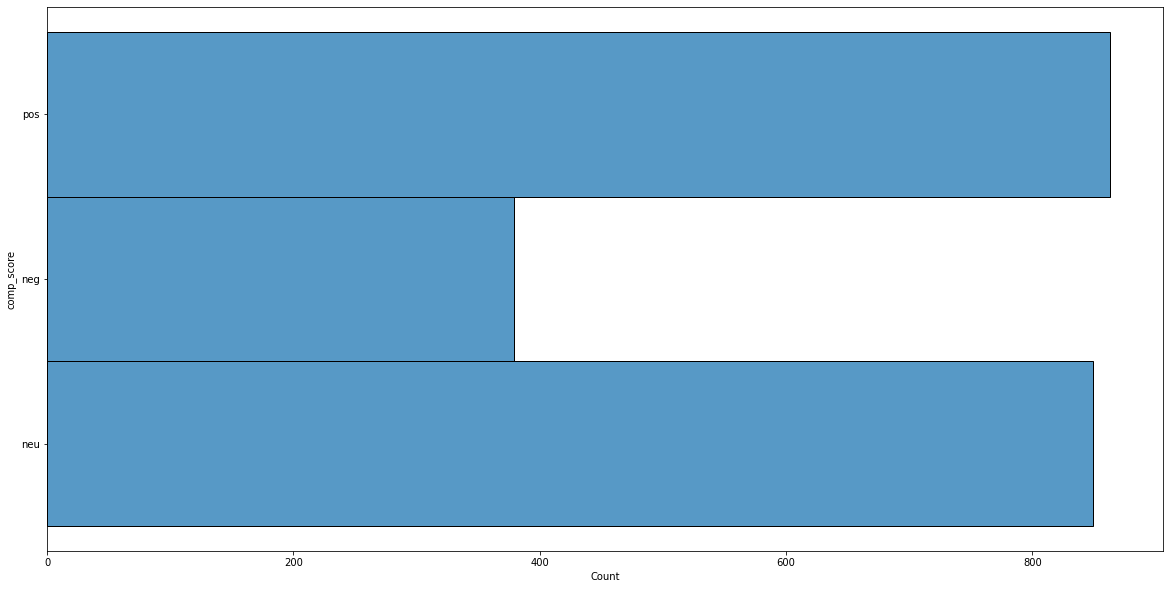

In [51]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, y="comp_score")
plt.show()

In [52]:
df["compound"].mean()

0.14780588235294118

Based on the values being above 0 for most of the time, with the overall average from March 2020 to March 2022 being 0.1478, it suggests that the public's opinion on the new F1 2022 car and regulations were generally neutral to slightly positive.

3. What were the main keywords on the new cars and regulations? (tag cloud)